# Prediction Task

The task is to build a regression model that can accurately predict the price of a PC based on its specifications.

# Background Research

# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import sklearn modules

In [2]:
# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Models
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, validation_curve

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_validate, KFold, learning_curve
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# Feature Selection
from sklearn.feature_selection import RFE

# Exploratory Data Analysis

In [3]:
# Load the dataset
pcDataset = pd.read_csv('pc_data (regression).csv')

# Make a copy of original dataset for EDA
pcEDA = pcDataset.copy()

In [4]:
# See the first 5 rows of the dataset
pcEDA.head()

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040


In [5]:
# See the last 5 rows of the dataset
pcEDA.tail()

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.402
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.106
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.826
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.066
15319,15319,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,989.786


From a first glance, it can be seen that product id is probably used for identifying the machine, so it probably would not be useful for our classification. Also, we notice that this dataset has a mix of categorical and numerical features.

In [6]:
# See the datatypes of each column
pcEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        15320 non-null  int64  
 1   Brand             15320 non-null  object 
 2   Type              15320 non-null  object 
 3   Screen Size       15320 non-null  float64
 4   Screen Specs      15320 non-null  object 
 5   CPU               15320 non-null  object 
 6   RAM               15320 non-null  object 
 7   Hard Disk         15320 non-null  object 
 8   GPU               15320 non-null  object 
 9   Operating System  15320 non-null  object 
 10  Weight            15320 non-null  object 
 11  Price ($)         15320 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


In [7]:
# See the numerical summary for numerical columns
pcEDA.describe()

,Product ID,Screen Size,Price ($)
count,15320.000000,15320.000000,15320.000000
mean,7659.500000,15.016475,3011.993343
std,4422.647397,1.425779,1865.353614
min,0.000000,10.100000,463.536000
25%,3829.750000,14.000000,1607.336000
50%,7659.500000,15.600000,2614.426000
75%,11489.250000,15.600000,3983.980000
max,15319.000000,18.400000,16259.336000


In [8]:
# See the number of null values in each column
pcEDA.isnull().sum()

Product ID          0
Brand               0
Type                0
Screen Size         0
Screen Specs        0
CPU                 0
RAM                 0
Hard Disk           0
GPU                 0
Operating System    0
Weight              0
Price ($)           0
dtype: int64

Using the pandas `.info()` function, we can see that the dataset has 15320 rows and 12 columns. There are both categorical and numerical columns in the dataset.

The pandas `.describe()` function allows us to see the descriptive summary of the numerical features of our dataset. We can ignore the product id feature as it is not relevant in our modelling. For Screen Size, we notice that the values are not really varied, which might indicated that this might be a categorical feature in numeric form. However, for price, the maximum value is well above the 75th percentile which indicates that there could be outliers in our target variable.

Using `.isna().sum()` we can see that there are no null values in our dataset at all.

In [9]:
# See the number of unique values in each column
for i in pcEDA:
    print(f"'{i}' column has {len(pcEDA[i].unique())} unique values.")

'Product ID' column has 15320 unique values.
'Brand' column has 19 unique values.
'Type' column has 6 unique values.
'Screen Size' column has 18 unique values.
'Screen Specs' column has 40 unique values.
'CPU' column has 118 unique values.
'RAM' column has 9 unique values.
'Hard Disk' column has 39 unique values.
'GPU' column has 110 unique values.
'Operating System' column has 9 unique values.
'Weight' column has 179 unique values.
'Price ($)' column has 9328 unique values.


It can be seen that for most of the features, there are many unique values and most of them are from categorical features.

This could be a problem as this means that our dataset has high cardinality and this could lead to the dimension of the dataset being too large when we need to encode the categorical features.

For example, when using the `OneHotEncoder()`.

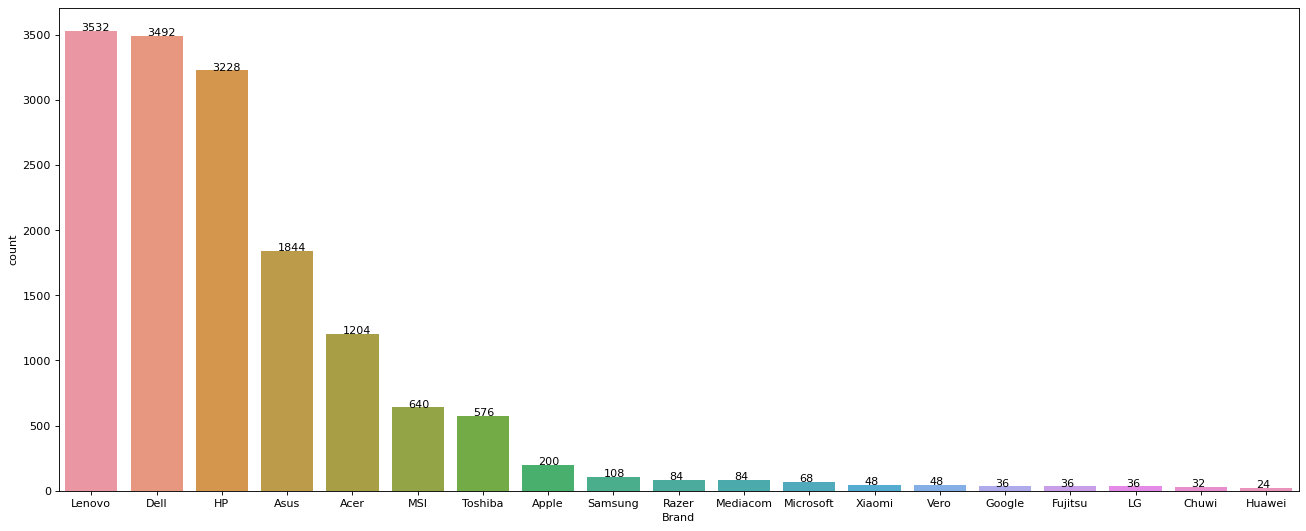

In [10]:
plt.figure(figsize=(20,8), dpi=80)
ax = sns.countplot(x='Brand', data=pcEDA, order = pcEDA['Brand'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

From the countplot of the `Brand` feature, we notice that Lenovo is the most popular brand inthe pc industry as it has the most occurence, however not falling short behind is are Dell and HP with 3532, 3492, and 3228 pcs of those brands respectively.

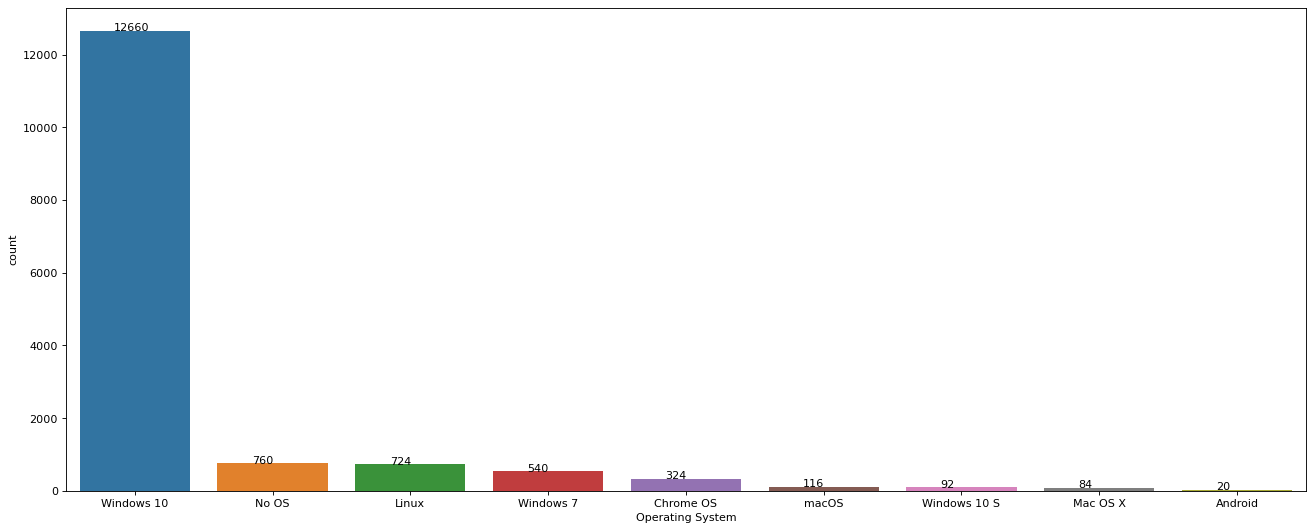

In [11]:
plt.figure(figsize=(20,8), dpi=80)
ax = sns.countplot(x='Operating System', data=pcEDA, order = pcEDA['Operating System'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

For the `Operating System` fetaure, we notice that there are operating systems of the same type but different versions, with version Windows 10 being the most popular operating system as out of 15320 laptops, 12660 of them run on Windows 10.

# Preprocessing/Feature Engineering

From the unique values under the `RAM` feature, we see that the values are joined with the unit 'GB' and, the idea here is to extract only the numerical value from the original feature. We will rename the feature to `RAM (GB)` to keep the unit of measurement of this feature for easier interpretation.

In [12]:
pcEDA['RAM'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [13]:
def preprocessRam(data):
    data['RAM'] = data['RAM'].map(lambda x: x.rstrip('GB')).astype('i')
    data.rename(columns={"RAM": "RAM (GB)"}, inplace=True)
    return data

From the unique values under the `Weight` feature, we see that the values are joined with the unit 'kg' and, the idea here is to extract only the numerical value from the original feature. We will rename the feature to `Weight (kg)` to keep the unit of measurement of this feature for easier interpretation.

In [14]:
pcEDA['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [15]:
def preprocessWeight(data):
    data['Weight'] = data['Weight'].map(lambda x: x.rstrip('kg')).astype('float')
    data.rename(columns={"Weight": "Weight (kg)"}, inplace=True)
    return data

For the `CPU` feature, we notice it has high cardinality meaning a lot of unique values. This can be a problem, therefore, we will only extract the most useful subset of this feature. I decided to extract the brand of the CPU as well as the series of the CPU (for e.g. 'Intel Core i7') and we also notice that some of the unique values are actually the same but is differentiated because of the letters' casing (for e.g. 'Intel Core M M3' and 'Intel Core M m3'), so we will group them back together as well.

In [16]:
pcEDA['CPU'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [17]:
def preprocessCPU(data):
    import re
    cpu_brand = data["CPU"].map(lambda x: re.findall('.*? \d+',x)[0].strip())

    cpu_brand = cpu_brand.map(lambda x: re.sub(" \d+.*", "", x))
    cpu_brand = cpu_brand.map(lambda x: re.sub("-[a-zA-Z0-9 ]+", "", x))
    cpu_brand = cpu_brand.map(lambda x: re.sub(' [Z,E,N][0-9]+', '', x))

    cpu_brand = cpu_brand.str.replace('(A[0-9]+)','')
    cpu_brand = cpu_brand.str.replace('Intel Core M M3','Intel Core M m3')
    cpu_brand = cpu_brand.str.replace('Intel Atom X5','Intel Atom x5')
    cpu_brand = cpu_brand.str.replace('Intel Core M M7', 'Intel Core M m7')
    cpu_brand = cpu_brand.str.replace('Samsung Cortex &', 'Samsung Cortex')
    cpu_brand[cpu_brand == 'AMD '] = cpu_brand[cpu_brand == 'AMD ']  + 'A'
    data['CPU'] = data['CPU'].map(lambda x: x.split()[-1]).map(lambda x: x.rstrip('GHz')).astype('float')
    data.rename(columns={"CPU": "CPU Processor Speed (GHz)"}, inplace=True)
    data.insert(5, 'CPU Brand', cpu_brand)
    return data

For the `Hard Disk` feature, we relaise that some of the pcs have two types of storage separated by a '+' symbol, therefore, we will write afunction to split the hard disk(s) storage spaces according to the types of the storage space.

In [18]:
pcEDA['Hard Disk'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [19]:
def preprocessHardDisk(data):
    flashStorage = np.zeros(data.shape[0])
    ssd = np.zeros(data.shape[0])
    hybrid = np.zeros(data.shape[0])
    hdd = np.zeros(data.shape[0])

    for i in range(data.shape[0]):
        if '+' not in data['Hard Disk'].iloc[i]:
            data['Hard Disk'].iloc[i] += ' + 0GB SSD'

    storage1 = data['Hard Disk'].map(lambda x: x.split('+')[0])
    storage2 = data['Hard Disk'].map(lambda x: x.split('+')[1])

    storage1Size = storage1.map(lambda x: x.split()[0])
    storage1Type = storage1.map(lambda x: x.split()[1])
    storage1Size = storage1Size.map(lambda x: '1000GB' if x=='1TB' or x=='1.0TB' else '2000GB' if x=='2TB' else x)
    storage1Size = storage1Size.map(lambda x: x.rsplit('GB')[0]).astype('i')

    storage2Size = storage2.map(lambda x: x.split()[0])
    storage2Type = storage2.map(lambda x: x.split()[1])
    storage2Size = storage2Size.map(lambda x: '1000GB' if x=='1TB' or x=='1.0TB' else '2000GB' if x=='2TB' else x)
    storage2Size = storage2Size.map(lambda x: x.rsplit('GB')[0]).astype('i')

    def groupIntoTypes(data1, data2):
        for i in range(len(data1)):
            if data1.iloc[i] == 'SSD':
                ssd[i] += int(data2.iloc[i])
            elif data1.iloc[i] == 'Flash':
                flashStorage[i] += int(data2.iloc[i])
            elif data1.iloc[i] == 'Hybrid':
                hybrid[i] += int(data2.iloc[i])
            elif data1.iloc[i] == 'HDD':
                hdd[i] += int(data2.iloc[i])

    groupIntoTypes(storage1Type, storage1Size)
    groupIntoTypes(storage2Type, storage2Size)

    data.drop('Hard Disk', axis=1, inplace=True)
    data.insert(8, 'Hard Disk - HDD (GB)', hdd)
    data.insert(8, 'Hard Disk - Hybrid (GB)', hybrid)
    data.insert(8, 'Hard Disk - Flash Storage (GB)', flashStorage)
    data.insert(8, 'Hard Disk - SSD (GB)', ssd)
    return data

For the `Screen Specs` feature, we realise that some of the screens are more 'high-end' (for e.g. 'Touchscreen' and 'IPS Panel'), therefore, it can be an influencing factor of the pcs' price. So, we will manually encode the laptops with '1' meaning present and '0' meaning absence for both 'Touchscreen' and 'IPS Panel' respectively.

In [20]:
pcEDA['Screen Specs'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [21]:
def preprocessScreen(data):

    touchscreen = np.zeros(data.shape[0])
    ips = np.zeros(data.shape[0])

    for i in range(data.shape[0]):
        if 'Touchscreen' in data['Screen Specs'][i]:
            touchscreen[i] += 1
        if 'IPS' in data['Screen Specs'][i]:
            ips[i] += 1

    screenResolution = data['Screen Specs'].map(lambda x: x.split()[-1])
    height = screenResolution.map(lambda x: int(x.split('x')[0]))
    width = screenResolution.map(lambda x: int(x.split('x')[1]))
    data.drop('Screen Specs', axis=1, inplace=True)
    data.insert(4, 'Height (px)', height)
    data.insert(4, 'Width (px)', width)
    data.insert(4, 'IPS', ips)
    data.insert(4, 'Touchscreen', touchscreen)
    return data

Calling the functions to preprocess/subset the necessary features (RAM, Weight, CPU, Hard Disk, Screen Specs) for EDA dataset

In [22]:
pcEDA = preprocessRam(pcEDA)
pcEDA = preprocessWeight(pcEDA)
pcEDA = preprocessCPU(pcEDA)
pcEDA = preprocessHardDisk(pcEDA)
pcEDA = preprocessScreen(pcEDA)

Calling the functions to preprocess/subset the necessary features (RAM, Weight, CPU, Hard Disk, Screen Specs) for dataset that is used for model training

In [ ]:
pcDataset = preprocessRam(pcDataset)
pcDataset = preprocessWeight(pcDataset)
pcDataset = preprocessCPU(pcDataset)
pcDataset = preprocessHardDisk(pcDataset)
pcDataset = preprocessScreen(pcDataset)
pcDataset.drop('Product ID', axis=1, inplace=True)

Encode the categorical features (Brand, Type, CPU, GPU, Operating System) using `OneHotEncoder()`

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)

def oneHot(data):

    brand = pd.DataFrame(ohe.fit_transform(data[['Brand']]),index=data.index, columns=ohe.categories_[0][1:])
    type = pd.DataFrame(ohe.fit_transform(data[['Type']]), index=data.index, columns=ohe.categories_[0][1:])
    cpu = pd.DataFrame(ohe.fit_transform(data[['CPU Brand']]), index=data.index, columns=ohe.categories_[0][1:])
    gpu = pd.DataFrame(ohe.fit_transform(data[['GPU']]), index=data.index, columns=ohe.categories_[0][1:])
    os = pd.DataFrame(ohe.fit_transform(data[['Operating System']]), index=data.index, columns=ohe.categories_[0][1:])

    data.drop(['Brand', 'Type', 'CPU Brand', 'GPU', 'Operating System'], axis=1, inplace=True)
    data = pd.concat([data, brand, type, cpu, gpu, os], axis=1)
    
    return data

pcDataset = oneHot(pcDataset)

# More EDA

We will also perform EDA on the preprocessed features

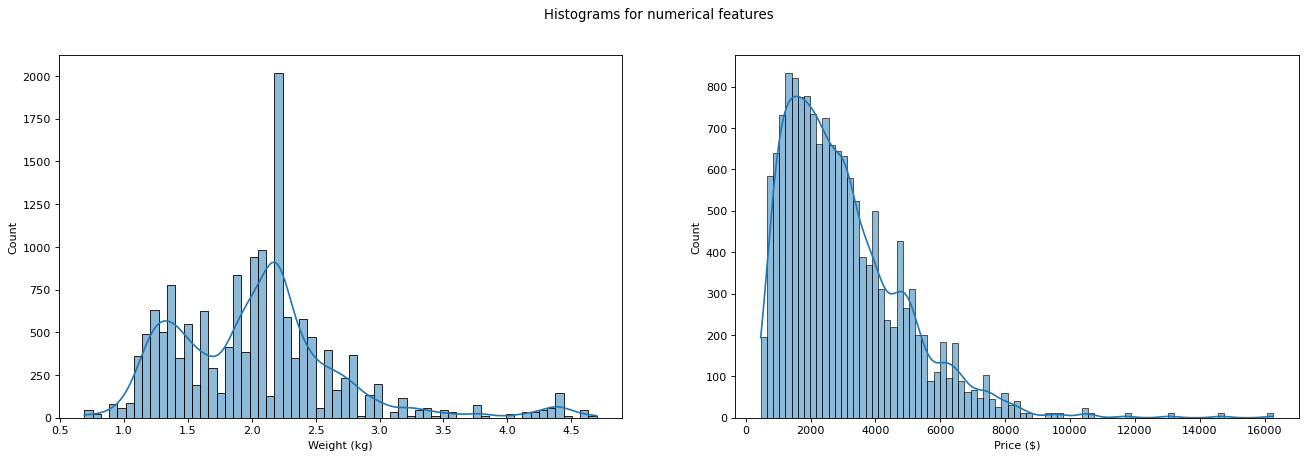

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=80)
sns.histplot(x=pcEDA['Weight (kg)'], kde=True, ax=ax[0])
sns.histplot(x=pcEDA['Price ($)'], kde=True, ax=ax[1])

fig.suptitle('Histograms for numerical features')
plt.show()

As expected, `Price ($)' of pcs have outliers and it seems to follow a skewed distribution towards the right indicating that there are pcs that are very expensive. We also note that most pcs are at a cost of around $1800 to $2000.

For the weight of the pcs, most of them are around 2.25 kg and the distribution seems to be a little more normally distributed but still a little positively-skewed.

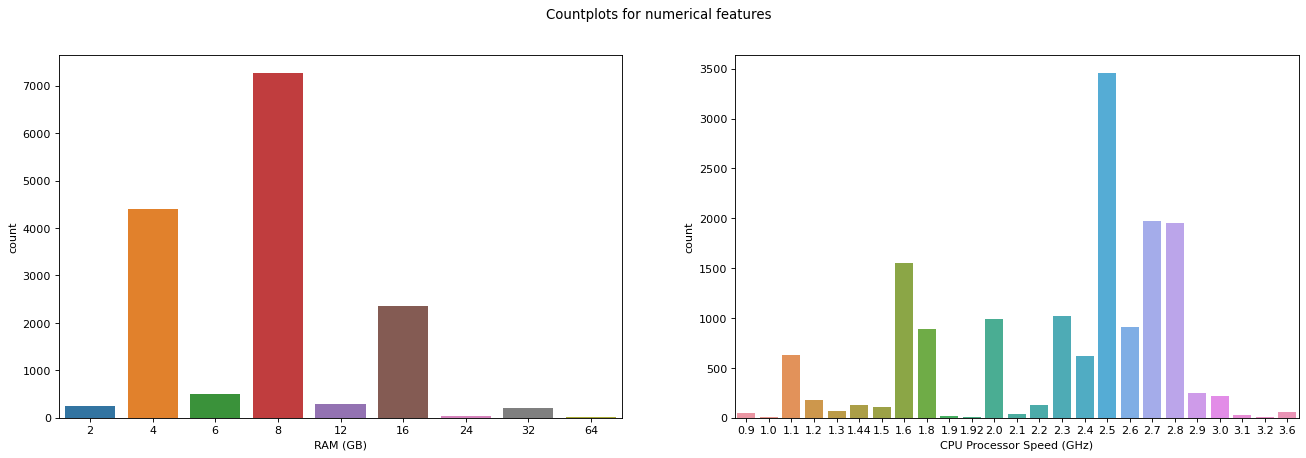

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=80)
sns.countplot(x=pcEDA['RAM (GB)'], ax=ax[0])
sns.countplot(x=pcEDA['CPU Processor Speed (GHz)'], ax=ax[1])

fig.suptitle('Countplots for numerical features')
plt.show()

We can see that most pcs have 8 GB of RAM and most pcs have a CPU Processor Speed of 2.5 GHz.

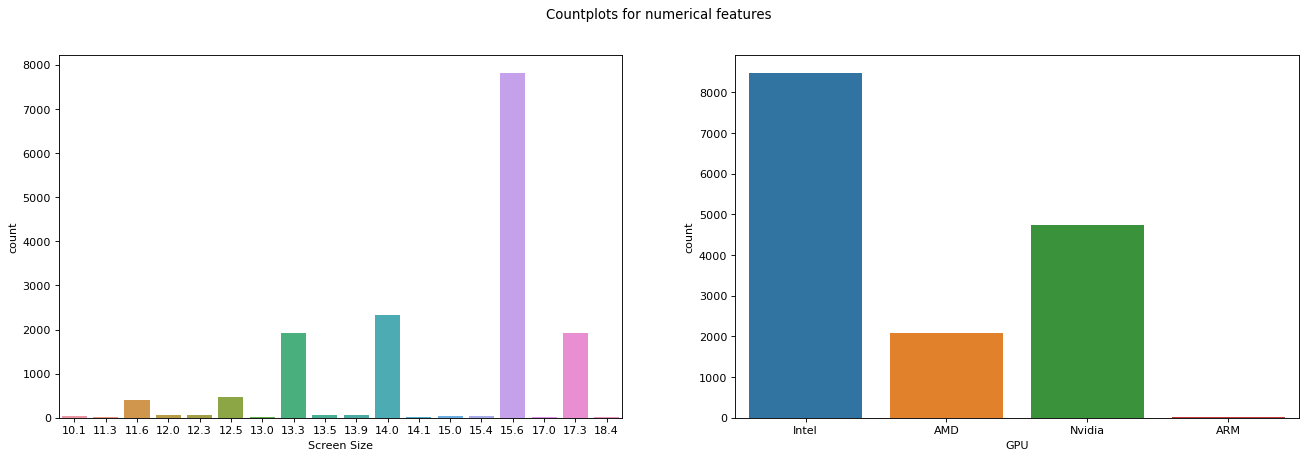

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=80)
sns.countplot(x=pcEDA['Screen Size'], ax=ax[0])
sns.countplot(x=pcEDA['GPU'].map(lambda x: x.split()[0]), ax=ax[1])

fig.suptitle('Countplots for numerical features')
plt.show()

We can see that `Screen Size` is indeed a categorical feature and most pcs have a screen size of 15.6 inches and the most common GPU brand is Intel.

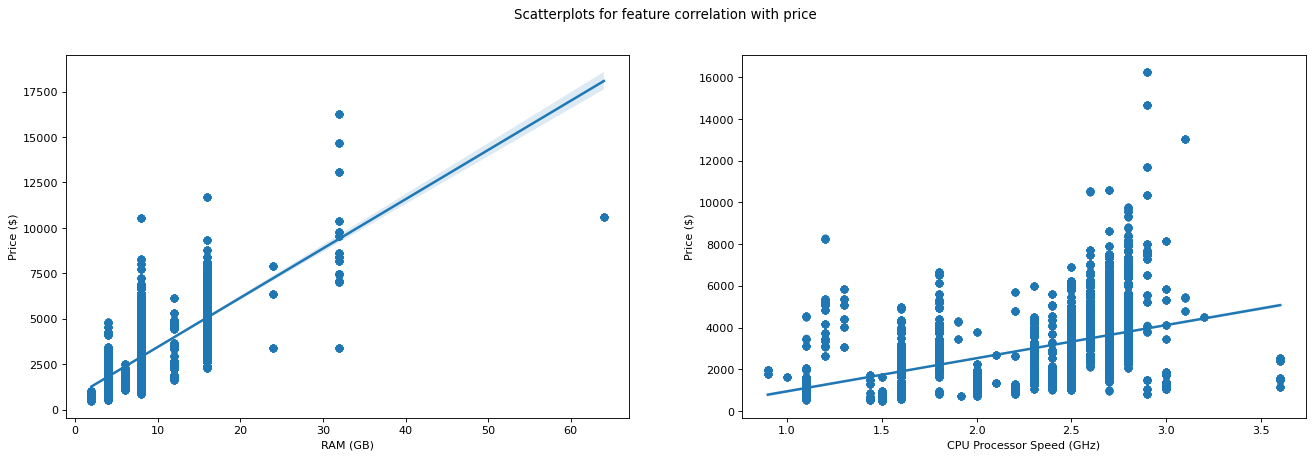

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=80)
sns.regplot(x=pcEDA['RAM (GB)'], y=pcEDA['Price ($)'], ax=ax[0])
sns.regplot(x=pcEDA['CPU Processor Speed (GHz)'], y=pcEDA['Price ($)'], ax=ax[1])

fig.suptitle('Scatterplots for feature correlation with price')
plt.show()

From the scatterplots, we can see that RAM and Price have a high correelation and CPU Processing Speed has a low correlation with Price.

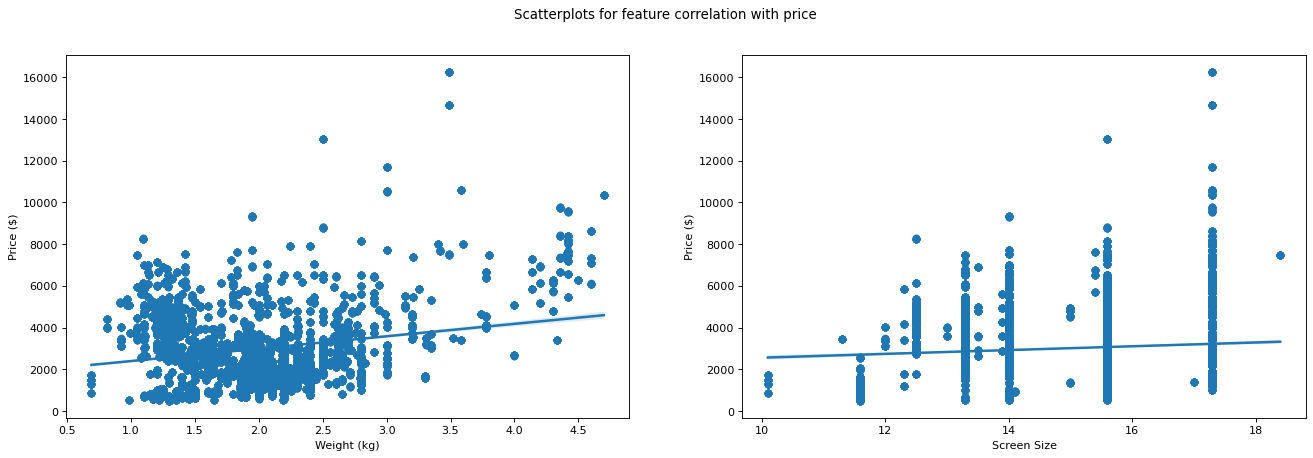

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=80)
sns.regplot(x=pcEDA['Weight (kg)'], y=pcEDA['Price ($)'], ax=ax[0])
sns.regplot(x=pcEDA['Screen Size'], y=pcEDA['Price ($)'], ax=ax[1])

fig.suptitle('Scatterplots for feature correlation with price')
plt.show()

From the scatterplots we can see that weight has a very weak correlation with price and screen size has almost no correlation with price.

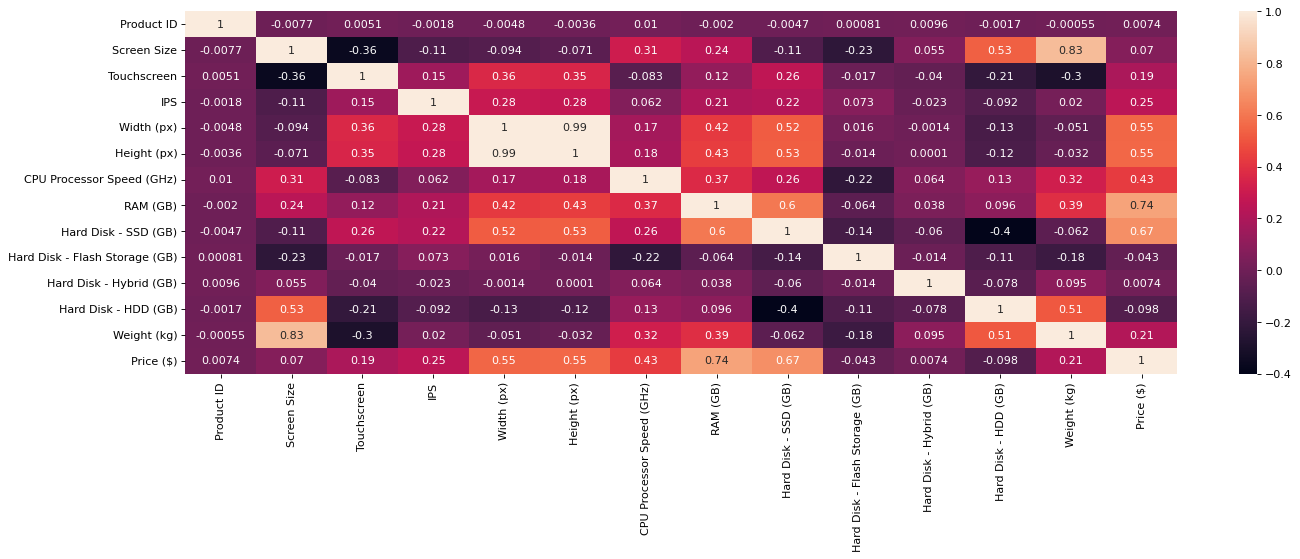

In [28]:
correlation = pcEDA.corr()
plt.figure(figsize=(20, 6), dpi=80)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

From the heat map there are two pairs of feqatures that have a strong correlation between each other, `Weight (kg) and Screen Size` and `Height (px) and Width (px)` with correlations of <b>0.83</b> and <b>0.99</b> respectively.
<b>

Setting a random state

In [29]:
# Creating random state used later
randoms = np.random.RandomState(85)

<b>Splitting the data</b>

Splitting the data into features and target variable (`Price ($)`).

Perform `train-test-split` for the data into train set and held-out test set for final model prediction with a ratio of <b>8:2</b>.

In [32]:
# Split the data into features and target
y = pcDataset['Price ($)']
X = pcDataset.drop('Price ($)', axis=1)

In [33]:
# Train test split to get training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randoms)

# Modelling/Model Selection

We will select our final model from 8 models; DummyRegressor(baseline), Ridge, Lasso, KNeighborsRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, DecisionTreeRegressor, RandomForestRegressor.

We will select our models using methods like cross-validation using `KFold()` and plotting learning curves.

In [34]:
estimators=[DummyRegressor(strategy="median"), Ridge(), Lasso(), KNeighborsRegressor(), GradientBoostingRegressor(random_state=randoms), 
            HistGradientBoostingRegressor(random_state=randoms), DecisionTreeRegressor(random_state=randoms), RandomForestRegressor(random_state=randoms)]

estimatorsName = ['Dummy Regressor', 'Ridge', 'Lasso', 'KNeighbors Regressor', 'Gradient Boosting Regressor', 
                  'HistGradientBoosting Regressor', 'Decision Tree Regressor', 'Random Forest Regressor']

Defining a function to plot the learning curves

In [35]:
def analyseModel(estimator, estimatorName):

    count = 0
    fig, ax = plt.subplots(2, 4, figsize=(30, 9), dpi=80)

    for i in range(2):

        for j in range(4):

            train_sizes, train_scores, test_scores = learning_curve(estimator[count], X_train, y_train, cv=5, 
                                                            train_sizes=np.linspace(0.1, 1, 25), scoring="neg_root_mean_squared_error", n_jobs=-1)
    
            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)

            ax[i,j].plot(train_sizes, train_mean, label="Train score")
            ax[i,j].plot(train_sizes, test_mean, label="Cross validation score")

            ax[i,j].fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color="r")
            ax[i,j].fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color="b")

            ax[i,j].set_title(estimatorName[count])
            ax[i,j].ticklabel_format(style='plain')

            count +=1

    plt.suptitle("Learning curve")
    fig.text(0.09, 0.5, 'RMSE', ha='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Training sizes', va='center')
    plt.legend(loc='best')

    plt.show()

Calling the function to plot the learning curves

In [36]:
analyseModel(estimators, estimatorsName)

Cross-validating using <b><i>KFold()</i></b>

As we can see, `DummyRegressor` (baseline model) performed the worst with an extremely poor test and train RMSE scores.

For `Ridge`. `Lasso`, `GradientBoostingRegressor` and `HistGradientBoostingRegressor`, they all performed similarly, with mediocre test and train RMSE scores.

`KNeighborsRegressor` performs quite well returning good test and train RMSE scores, however, the gap between the train and test RMSE score is relatively big as compared to the other models, suggesting it is overfitting as it has a high variance.

It is a small difference between `DecisionTreeRegressor` and `RandomForestRegressor` and they both returned extremely good test and train RMSE scores but DecisionTreeRegressor has an extremely slight advantage.

Therefore, `DecisionTreeRegressor` is our best performing model, and it is almost 40 times better than our baseline model.

In [ ]:
for i in range(len(estimators)):

    score = cross_validate(estimators[i], X_train, y_train, cv=KFold(n_splits = 5, shuffle = True,random_state=randoms), 
                               return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
    scoreDF = pd.DataFrame(score).drop(['fit_time', 'score_time'], axis=1)
    
    for j in range(scoreDF.shape[1]):
        if j != scoreDF.shape[1]-1:
            print(f"Average test RMSE for {estimatorsName[i]}: {np.mean(scoreDF.iloc[:,j]):.2f}")
        else:
            print(f"Average train RMSE for {estimatorsName[i]}: {np.mean(scoreDF.iloc[:,j]):.2f}\n")

Average test RMSE for Dummy Regressor: -1904.55
Average train RMSE for Dummy Regressor: -1905.52

Average test RMSE for Ridge: -671.48
Average train RMSE for Ridge: -663.75

Average test RMSE for Lasso: -706.06
Average train RMSE for Lasso: -695.47

Average test RMSE for KNeighbors Regressor: -102.64
Average train RMSE for KNeighbors Regressor: -70.02

Average test RMSE for Gradient Boosting Regressor: -573.28
Average train RMSE for Gradient Boosting Regressor: -563.77

Average test RMSE for HistGradientBoosting Regressor: -294.67
Average train RMSE for HistGradientBoosting Regressor: -271.79

Average test RMSE for Decision Tree Regressor: -56.45
Average train RMSE for Decision Tree Regressor: -52.26

Average test RMSE for Random Forest Regressor: -56.49
Average train RMSE for Random Forest Regressor: -52.52



# Model Improvement

We will improve our model in 4 ways:

<ol>
    <li>Feature selection</li>
    <li>Feature creation</li>
    <li>Handling multicollinearity</li>
    <li>Hyperparameter tuning</li>
</ol>

<b>Feature selection</b>

After feature selection we can see that we reduced the variance of the model slightly, this is because 'noise' that was affecting our model was removed, reducing the overfitting issue.

In [ ]:
rfe = RFE(DecisionTreeRegressor(random_state=randoms),n_features_to_select=0.38)
rfe.fit(X_train, y_train)
X_train = X_train.loc[:,rfe.get_support()]
X_test = X_test.loc[:,rfe.get_support()]

In [ ]:
score = cross_validate(DecisionTreeRegressor(random_state=randoms), X_train, y_train, cv= KFold(n_splits = 5, shuffle = True, random_state=randoms), 
                               return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
scoreDF = pd.DataFrame(score).drop(['fit_time', 'score_time'], axis=1)

np.mean(scoreDF)

test_score    -56.093189
train_score   -52.301064
dtype: float64

<b>Feature creation</b>

After feature creation, we noticed that the variance has been reduced even more.

In [ ]:
def engineerScreen(data):
    # aspect_ratio = data['Height (px)']/data['Width (px)']
    ppi = np.sqrt((data['Height (px)'] ** 2 ) + (data['Width (px)'] ** 2) )/ data['Screen Size']
    # data.insert(4, 'Aspect Ratio', aspect_ratio)
    data.insert(4, 'PPI', ppi)
    return data

X_train = engineerScreen(X_train)
X_test = engineerScreen(X_test)

In [ ]:
score = cross_validate(DecisionTreeRegressor(random_state=randoms), X_train, y_train, cv= KFold(n_splits = 5, shuffle = True, random_state=randoms), 
                               return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
scoreDF = pd.DataFrame(score).drop(['fit_time', 'score_time'], axis=1)

np.mean(scoreDF)

test_score    -56.014677
train_score   -52.282161
dtype: float64

<b>Handling multicollinearity</b>

After addressing the multicollinearity identified at the start, we notice that the variance has dropped as well. 

I chose to drop 'Height (px)' and 'Width (px)' as it was used in feature creation and it is a general rule to drop the original features after creating new features with it and at the same time, it handles the multicollinearity issue, killing two birds with one stone.

As for 'Screen Size', it was highly correlated to 'Weight (kg)' but I only chose to remove screen size as it had a lower correlation with the target variable.

Therefore, we can say that removing features that have high redundancy can increase our model's performance.

In [ ]:
X_train.drop('Screen Size', axis=1, inplace=True)
X_train.drop('Height (px)', axis=1, inplace=True)
X_train.drop('Width (px)', axis=1, inplace=True)
X_test.drop('Screen Size', axis=1, inplace=True)
X_test.drop('Height (px)', axis=1, inplace=True)
X_test.drop('Width (px)', axis=1, inplace=True)

In [ ]:
score = cross_validate(DecisionTreeRegressor(random_state=randoms), X_train, y_train, cv= KFold(n_splits = 5, shuffle = True, random_state=randoms), 
                               return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
scoreDF = pd.DataFrame(score).drop(['fit_time', 'score_time'], axis=1)

np.mean(scoreDF)

test_score    -55.232991
train_score   -52.393612
dtype: float64

<b>Hyperparameter tuning</b>

In [ ]:
params = {
    'max_features' : [1, 2, 3, 4, 5, 6, None, 'sqrt', 'log2', 'auto'],
    'max_depth' : np.arange(25,35,1),
    'min_samples_split' : [0, 1, 2, 3, 4, 5]
}
gridModel = GridSearchCV(DecisionTreeRegressor(random_state=randoms), params, cv=5 , n_jobs=-1, scoring="neg_root_mean_squared_error", verbose=3)
gridModel.fit(X_train,y_train)
y_pred = gridModel.predict(X_test)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


# Model Evaluation

In [ ]:
print('Best params:', gridModel.best_params_)
print('RMSE:' ,mean_squared_error(y_test, y_pred, squared=False))
print('MSE:' , mean_squared_error(y_test, y_pred))
print('MAE:' , mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Best params: {'max_depth': 34, 'max_features': 3, 'min_samples_split': 2}
RMSE: 60.51288045138774
MSE: 3661.8087005239445
MAE: 16.04146099460552
R2: 0.9989513227163972


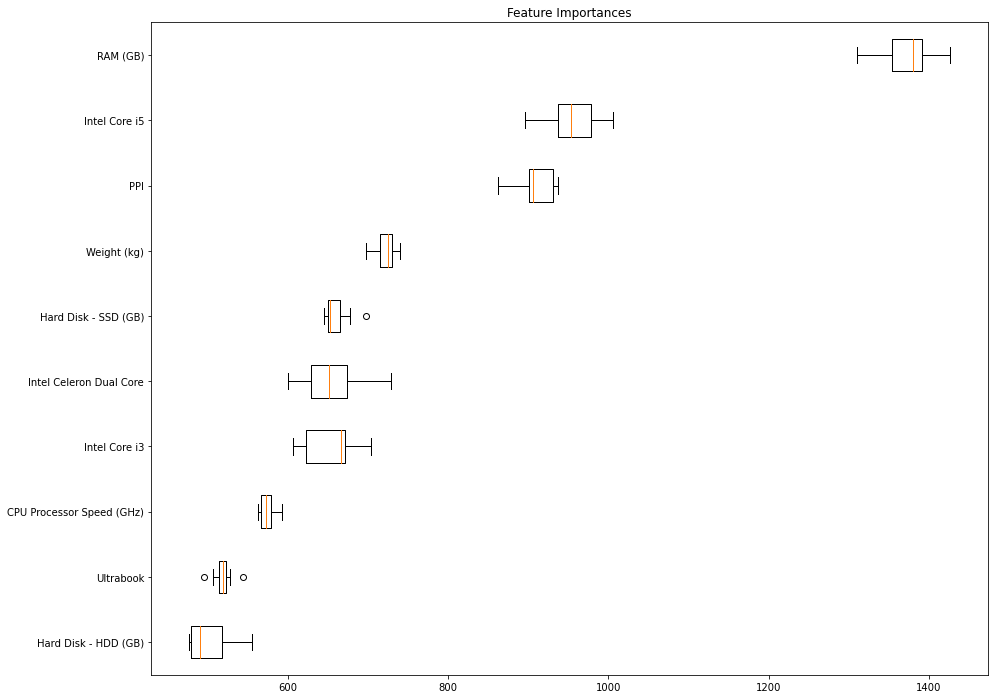

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
perm = permutation_importance(gridModel.best_estimator_, X_test, y_test, n_repeats=10, scoring='neg_root_mean_squared_error', random_state =randoms)
ax.boxplot(pd.DataFrame(perm.importances[perm.importances_mean.argsort()][-10:].T), labels=X_test.columns[perm.importances_mean.argsort()][-10:],vert=False)
plt.title("Feature Importances")
fig.show()